In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("D:\\DataSet\\newplacementdata.csv")
df.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1


In [4]:
# Even = ((n/2) + ((n/2)+1))/2
# Odd = ((n/2)+1)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

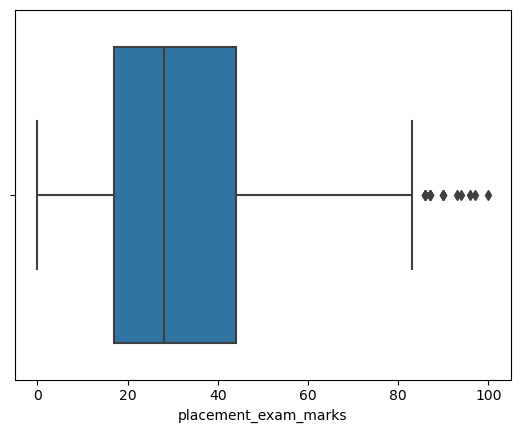

In [7]:
sns.boxplot(x = df["placement_exam_marks"])

In [8]:
percentile25 = df["placement_exam_marks"].quantile(0.25)
percentile75 = df["placement_exam_marks"].quantile(0.75)

In [9]:
print("percentile25 : ", percentile25)
print("percentile75 : ", percentile75)

percentile25 :  17.0
percentile75 :  44.0


In [14]:
IQR = percentile75-percentile25   # Interquartile range
IQR

27.0

In [12]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

84.5

In [13]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

-23.5

# Finding our Outliers

In [16]:
df[df["placement_exam_marks"] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [17]:
df[df["placement_exam_marks"] < lower_limit]

,cgpa,placement_exam_marks,placed


### Triming (outliers removing technique : 1)

In [18]:
newdf = df[df["placement_exam_marks"] < upper_limit]
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


### Comparision

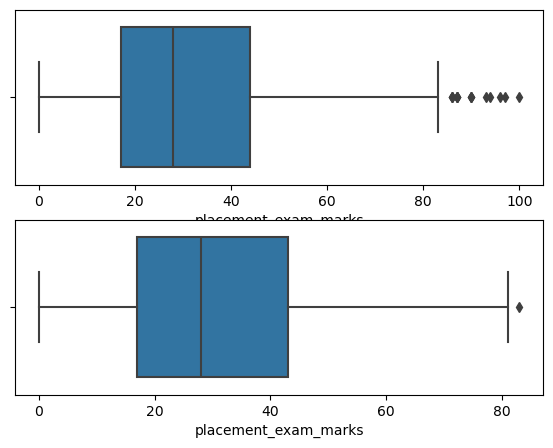

In [25]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x = df["placement_exam_marks"])

plt.subplot(224)
sns.boxplot(x = newdf["placement_exam_marks"])

plt.show()

In [26]:
new_df_cap = df.copy()

In [27]:
new_df_cap["placement_exam_marks"] = np.where(
    
    new_df_cap["placement_exam_marks"] > upper_limit,
    upper_limit,

    np.where(
        new_df_cap["placement_exam_marks"] < lower_limit,
        lower_limit,
        new_df_cap["placement_exam_marks"]
    )
)

In [28]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


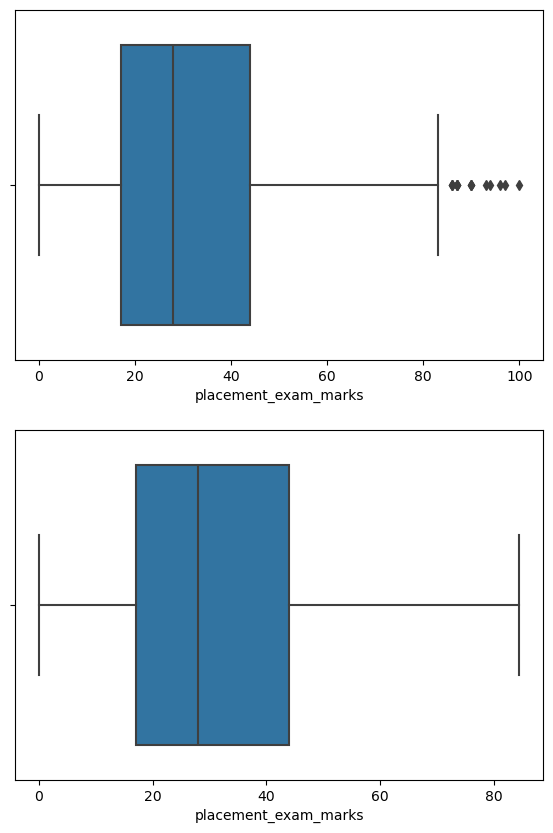

In [32]:
plt.figure(figsize = (15,10))

plt.subplot(222)
sns.boxplot(x = df["placement_exam_marks"])

plt.subplot(224)
sns.boxplot(x = new_df_cap["placement_exam_marks"])

plt.show()